# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the *Maximum Likelihood Estimate (MLE)* method to estimate the parameters of some model, given some observations $D$.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [28]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
# Necessary to import Axes3D to use `plt.subplots(subplot_kw={'projection': '3d'})`
# as this internally sets up matplotlib for 3D projection, without this import you'll 
# get an error.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# show matplotlib figures inline
%matplotlib inline

In [3]:
# By default we set figures to be 7"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(7, 4), dpi=110)
plt.rc('font', size=10)

## 1. MLE recipe

Let's suppose you're given $n$ one dimensional data points $D = \{d_0, d_1, ...,  d_{n-1} \}$ which you believe follow a normal distribution. In this case, your model has two parameters: $\mu$ and $\sigma^2$.

Given your data $D$, you wish to find the most likely parameters of the normal distribution.
Let's assume the standard deviation ($\sigma$) is 0.5, now estimate the parameter $\mu$ of the model (the mean of the normal distribution representing your data). 

Use the Maximum Likelihood Estimate (MLE) formula to show that $\mu_{ML} = \frac{1}{n}\sum_i d_i$.

**Hint**: assuming the data points are independent, we have 

$$p(D|\mu) = \prod_i p(d_i | \mu) = \prod_i \mathcal{N}(d_i|\mu, \sigma^2)$$

Additionally, since this is a convex function, we can analytically find the stationary point that maximises the function where $\frac{dp(D|\mu)}{d\mu} = 0$.

**Note:** This should be done on paper (and ideally typed up in $\LaTeX$ in the cell below), not using Python.

### Answer

Write here your answer using latex notation. Alternatively, write your solution on paper and show it to a TA.

## 2. MLE with Python

We know want you to write a simple program that calculates $\mu_{\text{ML}}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

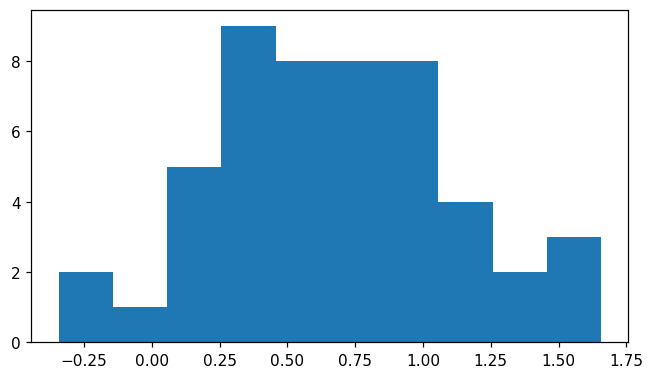

In [4]:
# write your code here
D = np.loadtxt('data1.dat', delimiter='\n')

n, bins, patches = plt.hist( D )

You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we talked about above when deriving $\mu_\text{ML}$, which we said we believe follows a normal distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [10]:
# write your code here
sigma = .5

def compute_likelihood(D, mu):
    prod = 1
    C = 1/((2*np.pi*(sigma**2))**.5)
    for d in D:
        prod *= C*np.e**(-((d - mu)**2) / (2*(sigma**2)))
    return prod

def samp_mean(D):
    return np.sum(D) / D.shape[0]
print(samp_mean(D))
print("liklihood of .5: ", compute_likelihood(D, .5))
print("liklihood of .7: ", compute_likelihood(D, .7))
print("liklihood of samp mean: ", compute_likelihood(D, samp_mean(D)))

0.6742339399999999
liklihood of .5:  2.161385304971018e-15
liklihood of .7:  4.210249324963285e-14
liklihood of samp mean:  4.499250614577151e-14


Write a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, \ldots , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array so that the first column contains the value $\mu$ and the second the likelihood $p(D|\mu)$ .

In [31]:
# write your code here

def loop_likelihood(D):
    schmax = 0
    for i in range(100):
        L = compute_likelihood(D, i/100)
        if L > schmax:
            schmax = L
    return schmax

loop_likelihood(D)

0.29662647545278137

### Questions:

- What is the value of the maximum likelihood $\text{ML} = \max p(D|\mu)$ ? 

- What is $\mu_{\text{ML}} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [26]:
# write your code here
# find the minimum and maximum values of the data set and incrementally find out the maximum probability 

def gen_mus(D):
    accuracy = 100
    minval = min(D)
    maxval = max(D)
    inc = (maxval - minval) / accuracy
    return [x * inc for x in range(accuracy)]

def max_likelihood(D):
    maxprob = 0
    maxmu = 0
    for mu in gen_mus(D):
        L = compute_likelihood(D, mu)
        if L > maxprob:
            maxprob = L
            maxmu = mu
    return maxmu, maxprob
i, maxprob = max_likelihood(D)
print("max_likelihood result: " + str(i) + ", " + str(maxprob))

"""
this computes the argmax of p(D|mu) because we are just brute-forcing trying many possibilities and finding the maximum
finding the true max of p(D|mu) involves calculus and results in the max probability being the sample mean. this is shown 
in the cell above
"""


max_likelihood result: 0.680289, 4.482784877113831e-14


'\nthis computes the argmax of p(D|mu) because we are just brute-forcing trying many possibilities and finding the maximum\nfinding the true max of p(D|mu) involves calculus and results in the max probability being the sample mean. this is shown \nin the cell above\n'

### Visual interpretation

Look at the obtained $\mu_{\text{ML}}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located at $\mu_{\text{ML}}$. Where does this line lie? Is it a meaningful position?

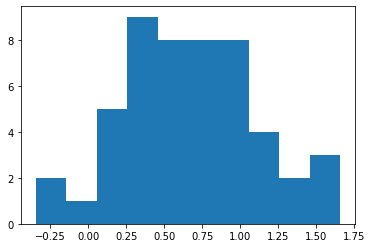

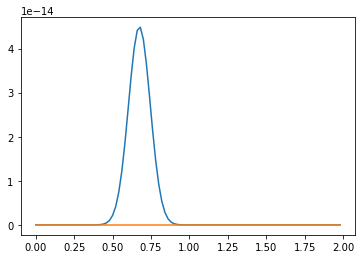

In [41]:
# write your code here
n, bins, patches = plt.hist( D )
fig, ax = plt.subplots()

mu = gen_mus(D)
prob = [compute_likelihood(D, e) for e in mu_vs_prob]
# print(mu_vs_prob)
ax.plot(mu, prob)
plt.show()

### Comparison with MLE recipe

Now implement the MLE recipe for $\mu_\text{ML}$ you solved at the beginning of this sheet to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [13]:
# write your code here

# 3. Posterior probability

Let's suppose now we have some prior knowledge regarding our parameter $\mu$. More precisely, our belief is that the probability density function (pdf) $p(\mu)$ modelling our parameter is also given by a normal distribution.

Assuming that $\mu \sim \mathcal{N}(0.5,0.01)$, write two functions, `compute_posterior(D, mu)` and `loop_posterior(D)`, to find $\mu_{\text{MAP}} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

In [15]:
# write your code here

### Visual interpretation


Now plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

In [17]:
# write your code here

Repeat now the above calculations for `data2.dat` and `data3.dat`. 

For both files, plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$.

In [19]:
# write your code here

### Question

Observe the results obtained on `data2` and `data3`. What can we tell by looking at the figures you plotted above?

### CORRECT ANSWER

When the likelihood is further from the suggested prior, we are less confident about our measurements, and thus we observe a larger distance between the two distributions' mean.

## EXTRA 1

Until now, you assumed that our data was generated from a normal distribution with $\sigma^2 = 0.25$. 

Remove this assumption and estimate $\theta_{\text{MAP}} = [\mu_{\text{MAP}}, \sigma_{\text{MAP}}]$ experimentally by looping through different values of $\mu$ and $\sigma$. 

Assume the pdf $p(\sigma)$ is given by $\mathcal{N}(0.5, 0.16)$.

You may need to use `np.nanargmax` instead of `np.argmax`.

In [21]:
# write your code here

## EXTRA 2

Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface`).
![MLE mesh](mle2.png)

In [23]:
# write your code here